<a href="https://www.opianalytics.com/"><img src = "https://pythondaymx.github.io/images/opi-analytics.png" width = 300></a>

<h1 align=center><font size = 5>Resolución de caso práctico - Data Scientist</font></h1>



#### Instrucciones:

● Resuelve sólo una pregunta de la sección A, resuelve la pregunta de la sección B y
resuelve el caso de la sección C.

● No se darán puntos adicionales si resuelves más de una pregunta por sección.

● Envía tus respuestas a más tardar 48 horas después de recibir el correo.

● Las respuestas podrán ser enviadas en un PDF, un notebook, o con un link a tu
repositorio de GitHub.

● Debes especificar claramente las respuestas de cada inciso, e indicar el código usado.

<h2 align="center"><b>Sección A<b></h2> 

<ins>Datos abiertos de la CDMX</ins>

La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las <b>carpetas de investigación aportados por la PGJ</b> . La tabla está disponible aquí:

https://datos.cdmx.gob.mx/explore

### Responderemos a las siguientes incógnitas:

1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cadaÁrea Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

     a) Pinta un mapa con este indicador. Describe los resultados.
    
10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados).

     a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?
    
12) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

## Pregunta 1:

Para asegurar la calidad de los datos, debemos:

* Trabajar con los **datos faltantes**, esto para que no nos arroje errores al momento de realizar los cálculos.

*  Lo ideal es convertir todos esos valores que puedan estar representado en el formato original como "N/A", "NA", "?", entre otros; pasarlos al indicador de valor perdido predeterminado de, en este caso, Python que se establece como "NaN", haciendo uso, por ejemplo, de la función replace() de la librería **pandas** y **numpy** para el indicador **nan**. Esta conversión además, ayuda a la velocidad de computación.

* Debemos también verificar la **consistencia de la información**. Si vamos al link de arriba en la carpeta mencionada, podemos ver que hay dos columnas de tiempo, en formato de fecha y hora; por lo que al momento de extraerlo, debemos hacer la respectiva conversión a ese formato, y además que tengan sentido las dos fechas correspondientes a una fila, ya que una de ellas indica la fecha y hora del suceso y la otra indica la fecha y hora del reporte del suceso, por lo que la primera debe ocurrir antes que la segunda.

* Por último, convertir las columnas correspondientes a latitud y longitud al formato correcto para trabajar con ellos en GeoPy, como coordenadas.


## Pregunta 2:

Para comprobar esto, extraeremos la información de la página; para nuestra conveniencia, nos facilitan un link de los históricos totales.

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

In [541]:
link = "https://datos.cdmx.gob.mx/api/datasets/1.0/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico/snapshots/1582326177/"

In [542]:
data = pd.read_csv(link, header = 0)

In [543]:
data.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2018.0,Marzo,2018-03-31 18:30,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,XOCHIMILCO,CALTONGO,2018,Abril,2018-04-01 00:03,COLIBRI,NaN,-99.084600,19.258433,"[19.2584328792, -99.0846002377]"
1,2018.0,Marzo,2018-03-31 12:40,PERDIDA DE LA VIDA POR PARO CARDIACO,HECHO NO DELICTIVO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-1SD,TLAHUAC,NaN,2018,Abril,2018-04-01 00:36,AVENIDA LA TURBA,NaN,NaN,NaN,NaN
2,2018.0,Abril,2018-04-01 00:00,NARCOMENUDEO POSESION SIMPLE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-4,UI-1CD,TLALPAN,JARDINES EN LA MONTAÑA,2018,Abril,2018-04-01 00:50,PERIFERICO SUR,NaN,-99.204160,19.304978,"[19.3049776399, -99.2041597379]"
3,2018.0,Marzo,2018-03-31 23:50,CONTRA FUNCIONARIOS PUBLICOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-1CD,ALVARO OBREGON,TORRES DE POTRERO,2018,Abril,2018-04-01 00:53,ALTA TENSION,FLOTS,-99.255478,19.329496,"[19.3294958332, -99.2554776348]"
4,2018.0,Abril,2018-04-01 01:10,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,NUEVA INDUSTRIAL VALLEJO,2018,Abril,2018-04-01 03:23,POLITECNICO,Y AVENIDA DE LOS 100 METROS,-99.148974,19.500777,"[19.5007766467, -99.148973921]"


In [51]:
import numpy as np

Contaremos valores faltantes en cada categoría:

In [52]:
data_faltante = data.isnull()

In [53]:
for column in data_faltante.columns.values.tolist():
    print(column)
    print (data_faltante[column].value_counts())
    print("")  

ao_hechos
False    930618
True        389
Name: ao_hechos, dtype: int64

mes_hechos
False    930618
True        389
Name: mes_hechos, dtype: int64

fecha_hechos
False    930694
True        313
Name: fecha_hechos, dtype: int64

delito
False    931007
Name: delito, dtype: int64

categoria_delito
False    931007
Name: categoria_delito, dtype: int64

fiscalia
False    931007
Name: fiscalia, dtype: int64

agencia
False    931007
Name: agencia, dtype: int64

unidad_investigacion
False    930782
True        225
Name: unidad_investigacion, dtype: int64

alcaldia_hechos
False    927921
True       3086
Name: alcaldia_hechos, dtype: int64

colonia_hechos
False    893950
True      37057
Name: colonia_hechos, dtype: int64

ao_inicio
False    931007
Name: ao_inicio, dtype: int64

mes_inicio
False    931007
Name: mes_inicio, dtype: int64

fecha_inicio
False    931007
Name: fecha_inicio, dtype: int64

calle_hechos
False    928501
True       2506
Name: calle_hechos, dtype: int64

calle_hechos2
True    

Con esto, podemos verificar que la cantidad de delitos registrados es de **931007**, ya que para la columna de *delito* no existen valores nulos.

In [56]:
print(data.dtypes)

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalia                 object
agencia                  object
unidad_investigacion     object
alcaldia_hechos          object
colonia_hechos           object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
calle_hechos             object
calle_hechos2            object
longitud                float64
latitud                 float64
geopoint                 object
dtype: object


Para la segunda parte de la pregunta 2, veamos el año mínimo y el máximo registrado en las tablas:

In [55]:
print(min(data['ao_hechos']), max(data['ao_hechos']))

1906.0 2019.0


Así, las tablas registran delitos que ocurrieron desde el **1906** hasta el **2019**.

## Pregunta 3:

Para resolver esto, agrupamos por delito cometido:

In [193]:
alcaldias = ['COYOACAN', 'MIGUEL HIDALGO', 'LA MAGDALENA CONTRERAS', 'TLAHUAC', 'AZCAPOTZALCO', 'IZTACALCO', 'ALVARO OBREGON', 'XOCHIMILCO', 'VENUSTIANO CARRANZA', 'TLALPAN', 'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'IZTAPALAPA', 'MILPA ALTA', 'BENITO JUAREZ', 'GUSTAVO A MADERO']
alcaldias

['COYOACAN',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'TLAHUAC',
 'AZCAPOTZALCO',
 'IZTACALCO',
 'ALVARO OBREGON',
 'XOCHIMILCO',
 'VENUSTIANO CARRANZA',
 'TLALPAN',
 'CUAJIMALPA DE MORELOS',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'MILPA ALTA',
 'BENITO JUAREZ',
 'GUSTAVO A MADERO']

In [196]:
dato_agrupado = data[data.alcaldia_hechos.isin(alcaldias)]['delito'].value_counts().to_frame().reset_index()
dato_agrupado = dato_agrupado.rename(columns = {'index':'DELITO', 'delito':'CANTIDAD'})

In [199]:
print(dato_agrupado.head(5))
print(dato_agrupado.shape)

                                           DELITO  CANTIDAD
0                              VIOLENCIA FAMILIAR     82116
1                    ROBO A NEGOCIO SIN VIOLENCIA     60258
2                                 ROBO DE OBJETOS     58058
3                                          FRAUDE     52940
4  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     48561
(277, 2)



En la CDMX, se contemplan **277** tipos de delitos diferentes, donde los que ocurren con mayor frecuencia son:

    1) VIOLENCIA FAMILIAR
    2) ROBO A NEGOCIO SIN VIOLENCIA
    3) ROBO DE OBJETOS
    4) FRAUDE
    5) ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA

## Pregunta 4:

Para resolver esto, vamos a considerar el comportamiento de los delitos cometidos del 2018 al 2019 para cada delito, omitiremos los valores con frecuencias menores a 50:

In [204]:
datos_2018 = data[data.ao_hechos.isin([2018]) & data.alcaldia_hechos.isin(alcaldias)]['delito'].value_counts().to_frame().reset_index().rename(columns = {'index':'DELITO', 'delito':'CANTIDAD'})
datos_2019 = data[data.ao_hechos.isin([2019]) & data.alcaldia_hechos.isin(alcaldias)]['delito'].value_counts().to_frame().reset_index().rename(columns = {'index':'DELITO', 'delito':'CANTIDAD'})
datos_2019 = datos_2019[datos_2019['CANTIDAD']>50]
datos_2018_2019 = datos_2019.merge(datos_2018, on='DELITO', how='left').rename(columns = {'index':'DELITO', 'CANTIDAD_x':'2019', 'CANTIDAD_y':'2018'})
condiciones = [datos_2018_2019['2019']>datos_2018_2019['2018'],datos_2018_2019['2019']==datos_2018_2019['2018'], datos_2018_2019['2019']<datos_2018_2019['2018']]
resultado = ['Aumenta', 'Se mantiene', 'Disminuye']
datos_2018_2019['CAMBIO'] = np.select(condiciones, resultado, default = np.nan)
datos_2018_2019

,DELITO,2019,2018,CAMBIO
0,VIOLENCIA FAMILIAR,24279,19942.0,Aumenta
1,ROBO A NEGOCIO SIN VIOLENCIA,15612,15982.0,Disminuye
2,AMENAZAS,13229,11096.0,Aumenta
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,13134,21958.0,Disminuye
4,ROBO DE OBJETOS,11981,14258.0,Disminuye
...,...,...,...,...
143,OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA,55,7.0,Aumenta
144,TENTATIVA DE SUICIDIO,55,20.0,Aumenta
145,PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO,53,66.0,Disminuye
146,ROBO A PASAJERO EN RTP CON VIOLENCIA,53,27.0,Aumenta


De acuerdo a ésto, podemos ver una pequeña lista de los delitos que han ido en aumento, en descenso o se mantuvieron:

In [205]:
#Aquí vemos la lista de delitos en aumento
datos_2018_2019[datos_2018_2019['CAMBIO']=='Aumenta']['DELITO']

0                                     VIOLENCIA FAMILIAR
2                                               AMENAZAS
12                          ROBO A NEGOCIO CON VIOLENCIA
13     ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...
14     DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...
                             ...                        
138                                   PLAGIO O SECUESTRO
140                                          FEMINICIDIO
143      OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA
144                                TENTATIVA DE SUICIDIO
146                 ROBO A PASAJERO EN RTP CON VIOLENCIA
Name: DELITO, Length: 88, dtype: object

In [207]:
#Aquí vemos la lista de delitos que se mantuvieron
datos_2018_2019[datos_2018_2019['CAMBIO']=='Se mantiene']['DELITO']

Series([], Name: DELITO, dtype: object)

In [208]:
#Aquí vemos la lista de delitos que disminuyeron
datos_2018_2019[datos_2018_2019['CAMBIO']=='Disminuye']['DELITO']

1                           ROBO A NEGOCIO SIN VIOLENCIA
3         ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
4                                        ROBO DE OBJETOS
5                                                 FRAUDE
6                             ROBO DE ACCESORIOS DE AUTO
7            ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO
8      ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...
9                   ROBO A CASA HABITACION SIN VIOLENCIA
10     FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...
11                          NARCOMENUDEO POSESION SIMPLE
16                                               DESPOJO
19                                    ABUSO DE CONFIANZA
20     ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...
22        ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA
23                   DAÑO EN PROPIEDAD AJENA INTENCIONAL
24     LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...
27        ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA
30                           RO

## Pregunta 5:

Para resolver aquí, agrupamos la cantidad de delitos registrados en el histórico por alcaldía:

In [211]:
dato_por_alcaldia = data[data.alcaldia_hechos.isin(alcaldias)]['alcaldia_hechos'].value_counts().to_frame().reset_index()
dato_por_alcaldia = dato_por_alcaldia.rename(columns = {'index':'ALCALDIA', 'alcaldia_hechos':'CANTIDAD'})
dato_por_alcaldia.head(20)

,ALCALDIA,CANTIDAD
0,CUAUHTEMOC,149918
1,IZTAPALAPA,139435
2,GUSTAVO A MADERO,92159
3,BENITO JUAREZ,80402
4,COYOACAN,62171
5,MIGUEL HIDALGO,61720
6,ALVARO OBREGON,61675
7,VENUSTIANO CARRANZA,53686
8,TLALPAN,53342
9,AZCAPOTZALCO,44677


Aquí podemos observar que la alcadía con mayor delitos registrados es **CUAUHTEMOC** is la que tiene menos registros es **MILPA ALTA**, y esto podría deberse a la concentración de población en cada una de ellas, pues **CUAUHTEMOC** está en el corazón de la CDMX, mientras que **MILPA ALTA** está a las afueras de ésta.

## Pregunta 6:

Para esto, vamos a agrupar por alcaldía y miraremos las 3 colonias con mayor registro:

In [213]:
for alcaldia in alcaldias:
    dato_por_alcaldia = data[data['alcaldia_hechos']==alcaldia]['colonia_hechos'].value_counts().to_frame().reset_index()
    dato_por_alcaldia = dato_por_alcaldia.rename(columns = {'index':'COLONIA', 'colonia_hechos':'CANTIDAD'})
    print(alcaldia)
    print(dato_por_alcaldia.head(3))

COYOACAN
                     COLONIA  CANTIDAD
0  PEDREGAL DE SANTO DOMINGO      5174
1                     AJUSCO      2810
2                 DEL CARMEN      2708
MIGUEL HIDALGO
                          COLONIA  CANTIDAD
0                         POLANCO      8296
1                         ANAHUAC      4338
2  LOMAS DE CHAPULTEPEC I SECCIÓN      3610
LA MAGDALENA CONTRERAS
                 COLONIA  CANTIDAD
0    SAN JERÓNIMO LÍDICE      1660
1  SAN NICOLÁS TOTOLAPAN      1158
2   SAN BERNABÉ OCOTEPEC       793
TLAHUAC
                   COLONIA  CANTIDAD
0                  DEL MAR      1282
1           MIGUEL HIDALGO      1242
2  SAN FRANCISCO TLALTENCO      1036
AZCAPOTZALCO
                  COLONIA  CANTIDAD
0              EL ROSARIO      3205
1      INDUSTRIAL VALLEJO      2185
2  CENTRO DE AZCAPOTZALCO      2025
IZTACALCO
              COLONIA  CANTIDAD
0   AGRÍCOLA ORIENTAL      7624
1  AGRÍCOLA PANTITLAN      6258
2      GRANJAS MÉXICO      4117
ALVARO OBREGON
               

## Pregunta 7:

Para esto, vamos a agrupar por periodos de tiempo y miraremos la cantidad de registros obtenidos para la ocurrencia del delito, como ya vimos que los delitos se registran desde el año 1906 al 2019, generaremos un análisis de ocurrencia de delitos acumulados para cada mes.

Primero, convertimos la columna de *fecha_hechos* al formato correcto y eliminamos los valores nulos:


In [230]:
from datetime import datetime

In [544]:
data['fecha_hechos'] = pd.to_datetime(data['fecha_hechos'], errors='coerce')

In [545]:
data['fecha_hechos'].dropna()

0        2018-03-31 18:30:00
1        2018-03-31 12:40:00
2        2018-04-01 00:00:00
3        2018-03-31 23:50:00
4        2018-04-01 01:10:00
                 ...        
931002   2019-12-31 18:00:00
931003   2019-12-31 21:30:00
931004   2019-12-30 17:00:00
931005   2014-04-15 12:00:00
931006   2019-12-31 17:10:00
Name: fecha_hechos, Length: 930618, dtype: datetime64[ns]

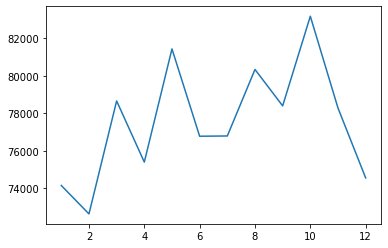

In [546]:
data_por_mes=data['fecha_hechos'].groupby(data['fecha_hechos'].dt.month).count()
plt.plot(data_por_mes)

Aquí podemos observar que el mes que presenta mayor registro de delitos es el mes de **Octubre**, lo que podríamos relacionar a fechas cercanas a la celebración del día del muerto, seguido del mes de **Mayo**, donde hay numerosos festivos, como el día de la madre y del trabajador.

Para el caso de días específicos del mes, veamos:

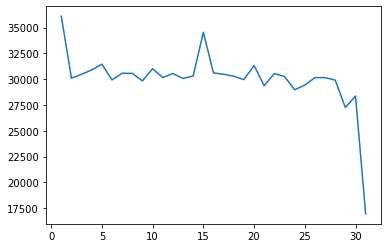

In [547]:
data_por_dia=data['fecha_hechos'].groupby(data['fecha_hechos'].dt.day).count()
plt.plot(data_por_dia)

Aquí podemos observar que los días en los que presenta mayor registro de delitos son los días **1** y **15**, esto es, fechas de quincenas, lo que es de esperarse, dado que el hurto constituye uno de los delitos con mayor frecuencia registrada.

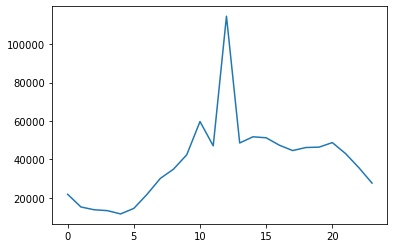

In [548]:
data_por_hora=data['fecha_hechos'].groupby(data['fecha_hechos'].dt.hour).count()
plt.plot(data_por_hora)

Para las horas del día, se registra un pico bastante alto para la hora del medio día, esto es, **12:00 pm** y se concentra el intervalo de horas que van desde las **10:00 am** hasta las **8:00 pm**

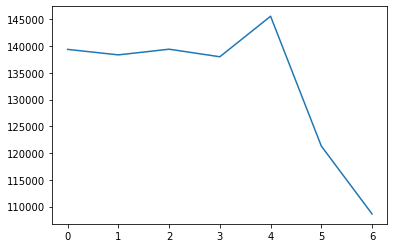

In [549]:
data_por_dia_semana=data['fecha_hechos'].groupby(data['fecha_hechos'].dt.dayofweek).count()
plt.plot(data_por_dia_semana)

Por cuestiones de rapidez, entiendase *0 = Lunes* y *6 = Domingo*, así, podemos ver que el día en el que se tienen mayores registros de delitos cometidos vendría a ser **4 = Viernes**

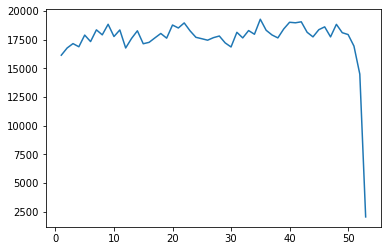

In [550]:
data_por_semana=data['fecha_hechos'].groupby(data['fecha_hechos'].dt.week).count()
plt.plot(data_por_semana)

Podemos notar aquí que no hay ningún pico notable en la gráfica, sin embargo, cabe resultar que para las últimas semanas del año, esto es, mes de diciembre, es cuando menos registros de delitos cometidos se tiene.

## Pregunta 8:

Para esto, vamos a mostrar las alcaldías donde ocurrió con mayor frecuencia cierto delito, así:

In [295]:
delitos = list(set(data[data.alcaldia_hechos.isin(alcaldias)]['delito']))
delitos.sort()

In [339]:
for delito in delitos:
    delito_por_alcaldia = data[data.delito.isin([delito]) & data.alcaldia_hechos.isin(alcaldias)]['alcaldia_hechos'].value_counts().to_frame().reset_index().rename(columns = {'index':'COLONIA', 'alcaldia_hechos':'CANTIDAD'})
    print(delito)
    print(delito_por_alcaldia.head(1).to_string(index=False))
    print("------------------------------------------------------------------------------")

ABANDONO DE PERSONA
    COLONIA  CANTIDAD
 CUAUHTEMOC       949
------------------------------------------------------------------------------
ABORTO
    COLONIA  CANTIDAD
 IZTAPALAPA        87
------------------------------------------------------------------------------
ABUSO DE AUTORIDAD
    COLONIA  CANTIDAD
 CUAUHTEMOC      1744
------------------------------------------------------------------------------
ABUSO DE CONFIANZA
    COLONIA  CANTIDAD
 CUAUHTEMOC      2206
------------------------------------------------------------------------------
ABUSO SEXUAL
    COLONIA  CANTIDAD
 IZTAPALAPA      1685
------------------------------------------------------------------------------
ACOSO SEXUAL
    COLONIA  CANTIDAD
 CUAUHTEMOC       418
------------------------------------------------------------------------------
ALLANAMIENTO DE MORADA
    COLONIA  CANTIDAD
 IZTAPALAPA       421
------------------------------------------------------------------------------
AMENAZAS
    COLONIA  CAN

## Pregunta 9:

Para resolver esto, debemos extraer de la categoria_delito los de tipo **homicidio doloso**, determinar la población total de la Ciudad de México y veamos cómo ha sido éste comportamiento en los últimos 4 años, ya que éstos últimos son de los que más registros se tienen; del año 2016 hacia atrás, solo se tienen registros a lo más, dos de ellos por alcaldía.

Así, veamos entonces, el comportamiento del año 2016 al 2019.

Dado que el último censo registrado en la Ciudad de México fue en el 2015, publicado por la INEGI, y no establece la población por alcaldía, usaremos las estimaciones que desarrolló el Consejo Nacional de Población, para los respectivos años, las cuales hemos descargado localmente.

In [381]:
data_conapo = pd.read_csv('base_municipios_final_datos_01.csv', header = 0, encoding='latin-1')

In [382]:
data_conapo.head()

,RENGLON,CLAVE,CLAVE_ENT,NOM_ENT,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1,1001,1,Aguascalientes,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,2,1001,1,Aguascalientes,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,3,1001,1,Aguascalientes,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,4,1001,1,Aguascalientes,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,5,1001,1,Aguascalientes,Aguascalientes,Mujeres,2019,pobm_00_04,38272


In [431]:
data_conapo_2016_2019 = data_conapo[data_conapo['NOM_ENT']=='Ciudad de México'][['MUN', 'SEXO', 'AÑO','POB']]
data_conapo_total = data_conapo_2016_2019[['MUN','POB', 'AÑO']].groupby(['MUN','AÑO']).sum().reset_index()
data_conapo_total = data_conapo_total[data_conapo_total.AÑO.isin([2016,2017,2018,2019])]
data_conapo_total['MUN'] = data_conapo_total['MUN'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
data_conapo_total = data_conapo_total.replace('GUSTAVO A. MADERO', 'GUSTAVO A MADERO')
data_conapo_total

,MUN,AÑO,POB
1,AZCAPOTZALCO,2016,415389
2,AZCAPOTZALCO,2017,413357
3,AZCAPOTZALCO,2018,411503
4,AZCAPOTZALCO,2019,409860
17,BENITO JUAREZ,2016,418868
...,...,...,...
228,XOCHIMILCO,2019,419426
241,ALVARO OBREGON,2016,753460
242,ALVARO OBREGON,2017,754581
243,ALVARO OBREGON,2018,755299


Extraemos las coordenadas que identifican a cada alcaldía de la Ciudad de México, archivo dispuesto en la INEGI, y descargado de manera local para facilitar el trabajo.

In [432]:
import xlrd

In [471]:
poligonos_alcaldias = pd.read_excel(r'poligonos_alcaldias.xlsx')
poligonos_alcaldias[['Latitud', 'Longitud']] = poligonos_alcaldias['Geo Point'].str.split(", ",expand=True).astype(float)
poligonos_alcaldias['NOMBRE'] = poligonos_alcaldias['NOMBRE'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
poligonos_alcaldias = poligonos_alcaldias.replace('GUSTAVO A. MADERO', 'GUSTAVO A MADERO')
poligonos_alcaldias = poligonos_alcaldias.drop(columns=['Geo Point', 'CVE_ENTIDAD', 'CLAVE_MUNICIPAL','Geo Shape','municipio'])
poligonos_alcaldias = poligonos_alcaldias.rename(columns = {'NOMBRE':'MUN'})

In [472]:
poligonos_alcaldias

,MUN,CVEGEO,Latitud,Longitud
0,MILPA ALTA,9009,19.139457,-99.051095
1,BENITO JUAREZ,9014,19.380642,-99.161135
2,GUSTAVO A MADERO,9005,19.504065,-99.115864
3,AZCAPOTZALCO,9002,19.485329,-99.182107
4,IZTACALCO,9006,19.396912,-99.094330
5,ALVARO OBREGON,9010,19.336176,-99.246820
6,XOCHIMILCO,9013,19.245145,-99.090364
7,VENUSTIANO CARRANZA,9017,19.430495,-99.093106
8,TLALPAN,9012,19.198340,-99.206221
9,CUAJIMALPA DE MORELOS,9004,19.324634,-99.310729


Asociemos cada Alcaldía con su población estimada en el año 2016, la cantidad de casos registrados y la georeferencia de la alcaldía correspondiente.

In [507]:
datos_2016 = data[data.ao_hechos.isin([2016]) & data.alcaldia_hechos.isin(alcaldias) & data.categoria_delito.isin(['HOMICIDIO DOLOSO'])]['alcaldia_hechos'].value_counts().to_frame().reset_index().rename(columns = {'index':'MUN', 'alcaldia_hechos':'CANTIDAD'})
resultado_2016 = pd.merge(data_conapo_total[data_conapo_total.AÑO.isin([2016]) & data_conapo_total.MUN.isin(alcaldias)], datos_2016,on='MUN')
resultado_2016 = pd.merge(resultado_2016, poligonos_alcaldias, on='MUN')
resultado_2016['indicador'] = resultado_2016['CANTIDAD']/resultado_2016['POB']*100000
resultado_2016['indicador'] = resultado_2016['indicador'].round(0).astype(int)
resultado_2016

,MUN,AÑO,POB,CANTIDAD,CVEGEO,Latitud,Longitud,indicador
0,AZCAPOTZALCO,2016,415389,31,9002,19.485329,-99.182107,7
1,BENITO JUAREZ,2016,418868,27,9014,19.380642,-99.161135,6
2,COYOACAN,2016,630049,34,9003,19.326667,-99.150376,5
3,CUAJIMALPA DE MORELOS,2016,196329,7,9004,19.324634,-99.310729,4
4,CUAUHTEMOC,2016,544605,99,9015,19.431373,-99.149056,18
5,GUSTAVO A MADERO,2016,1193647,154,9005,19.504065,-99.115864,13
6,IZTACALCO,2016,396794,37,9006,19.396912,-99.094330,9
7,IZTAPALAPA,2016,1843315,229,9007,19.349166,-99.056799,12
8,LA MAGDALENA CONTRERAS,2016,245103,15,9008,19.268977,-99.268413,6
9,MIGUEL HIDALGO,2016,375725,48,9016,19.428062,-99.204567,13


In [508]:
from folium import plugins

In [511]:
mapa_cdmx = folium.Map(location=[19.332383, -99.147145], zoom_start=11, tiles='Mapbox Bright')

In [513]:
for lat, lng, indicador, nombre in zip(resultado_2016.Latitud, resultado_2016.Longitud, resultado_2016.indicador, resultado_2016.MUN):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=str(indicador) +" homicidios dolosos por cada 100.000 habitantes en "+ nombre,
    ).add_to(mapa_cdmx)
mapa_cdmx

Así, para el año 2016, registramos que las alcaldías con mayor índice de **HOMOCIDIOS DOLOSOS** fueron la **VENUSTIANO CARRANZA** y la **CUAUHTEMOC** con unos índices de **20 y 18 homocidios culposos por cada 100.000 habitantes** respectivamente.

In [514]:
datos_2017 = data[data.ao_hechos.isin([2017]) & data.alcaldia_hechos.isin(alcaldias) & data.categoria_delito.isin(['HOMICIDIO DOLOSO'])]['alcaldia_hechos'].value_counts().to_frame().reset_index().rename(columns = {'index':'MUN', 'alcaldia_hechos':'CANTIDAD'})
resultado_2017 = pd.merge(data_conapo_total[data_conapo_total.AÑO.isin([2017]) & data_conapo_total.MUN.isin(alcaldias)], datos_2017,on='MUN')
resultado_2017 = pd.merge(resultado_2017, poligonos_alcaldias, on='MUN')
resultado_2017['indicador'] = resultado_2017['CANTIDAD']/resultado_2017['POB']*100000
resultado_2017['indicador'] = resultado_2017['indicador'].round(0).astype(int)
resultado_2017

,MUN,AÑO,POB,CANTIDAD,CVEGEO,Latitud,Longitud,indicador
0,AZCAPOTZALCO,2017,413357,41,9002,19.485329,-99.182107,10
1,BENITO JUAREZ,2017,422882,23,9014,19.380642,-99.161135,5
2,COYOACAN,2017,627775,44,9003,19.326667,-99.150376,7
3,CUAJIMALPA DE MORELOS,2017,197629,8,9004,19.324634,-99.310729,4
4,CUAUHTEMOC,2017,545675,114,9015,19.431373,-99.149056,21
5,GUSTAVO A MADERO,2017,1189130,215,9005,19.504065,-99.115864,18
6,IZTACALCO,2017,395939,34,9006,19.396912,-99.094330,9
7,IZTAPALAPA,2017,1837496,238,9007,19.349166,-99.056799,13
8,LA MAGDALENA CONTRERAS,2017,245355,14,9008,19.268977,-99.268413,6
9,MIGUEL HIDALGO,2017,376741,50,9016,19.428062,-99.204567,13


In [515]:
mapa_cdmx = folium.Map(location=[19.332383, -99.147145], zoom_start=11, tiles='Mapbox Bright')

In [516]:
for lat, lng, indicador, nombre in zip(resultado_2017.Latitud, resultado_2017.Longitud, resultado_2017.indicador, resultado_2017.MUN):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=str(indicador) +" homicidios dolosos por cada 100.000 habitantes en "+ nombre,
    ).add_to(mapa_cdmx)
mapa_cdmx

Así, para el año 2017, registramos que las alcaldías con mayor índice de **HOMOCIDIOS DOLOSOS** fueron la **CUAUHTEMOC** y la **VENUSTIANO CARRANZA** con unos índices de **21 y 20 homocidios culposos por cada 100.000 habitantes** respectivamente.

In [517]:
datos_2018 = data[data.ao_hechos.isin([2018]) & data.alcaldia_hechos.isin(alcaldias) & data.categoria_delito.isin(['HOMICIDIO DOLOSO'])]['alcaldia_hechos'].value_counts().to_frame().reset_index().rename(columns = {'index':'MUN', 'alcaldia_hechos':'CANTIDAD'})
resultado_2018 = pd.merge(data_conapo_total[data_conapo_total.AÑO.isin([2018]) & data_conapo_total.MUN.isin(alcaldias)], datos_2018,on='MUN')
resultado_2018 = pd.merge(resultado_2018, poligonos_alcaldias, on='MUN')
resultado_2018['indicador'] = resultado_2018['CANTIDAD']/resultado_2018['POB']*100000
resultado_2018['indicador'] = resultado_2018['indicador'].round(0).astype(int)
resultado_2018

,MUN,AÑO,POB,CANTIDAD,CVEGEO,Latitud,Longitud,indicador
0,AZCAPOTZALCO,2018,411503,56,9002,19.485329,-99.182107,14
1,BENITO JUAREZ,2018,426729,21,9014,19.380642,-99.161135,5
2,COYOACAN,2018,625634,47,9003,19.326667,-99.150376,8
3,CUAJIMALPA DE MORELOS,2018,198647,16,9004,19.324634,-99.310729,8
4,CUAUHTEMOC,2018,546713,137,9015,19.431373,-99.149056,25
5,GUSTAVO A MADERO,2018,1184801,257,9005,19.504065,-99.115864,22
6,IZTACALCO,2018,395153,54,9006,19.396912,-99.094330,14
7,IZTAPALAPA,2018,1830835,319,9007,19.349166,-99.056799,17
8,LA MAGDALENA CONTRERAS,2018,245445,23,9008,19.268977,-99.268413,9
9,MIGUEL HIDALGO,2018,377737,56,9016,19.428062,-99.204567,15


In [522]:
mapa_cdmx = folium.Map(location=[19.332383, -99.147145], zoom_start=11, tiles='Mapbox Bright')

In [523]:
for lat, lng, indicador, nombre in zip(resultado_2018.Latitud, resultado_2018.Longitud, resultado_2018.indicador, resultado_2018.MUN):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=str(indicador) +" homicidios dolosos por cada 100.000 habitantes en "+ nombre,
    ).add_to(mapa_cdmx)
mapa_cdmx

Así, para el año 2018, registramos que las alcaldías con mayor índice de **HOMOCIDIOS DOLOSOS** fueron la **VENUSTIANO CARRANZA** y la **CUAUHTEMOC** con unos índices de **26 y 25 homocidios culposos por cada 100.000 habitantes** respectivamente.

In [520]:
datos_2019 = data[data.ao_hechos.isin([2019]) & data.alcaldia_hechos.isin(alcaldias) & data.categoria_delito.isin(['HOMICIDIO DOLOSO'])]['alcaldia_hechos'].value_counts().to_frame().reset_index().rename(columns = {'index':'MUN', 'alcaldia_hechos':'CANTIDAD'})
resultado_2019 = pd.merge(data_conapo_total[data_conapo_total.AÑO.isin([2019]) & data_conapo_total.MUN.isin(alcaldias)], datos_2019,on='MUN')
resultado_2019 = pd.merge(resultado_2019, poligonos_alcaldias, on='MUN')
resultado_2019['indicador'] = resultado_2019['CANTIDAD']/resultado_2019['POB']*100000
resultado_2019['indicador'] = resultado_2019['indicador'].round(0).astype(int)
resultado_2019

,MUN,AÑO,POB,CANTIDAD,CVEGEO,Latitud,Longitud,indicador
0,AZCAPOTZALCO,2019,409860,48,9002,19.485329,-99.182107,12
1,BENITO JUAREZ,2019,430354,21,9014,19.380642,-99.161135,5
2,COYOACAN,2019,623683,59,9003,19.326667,-99.150376,9
3,CUAJIMALPA DE MORELOS,2019,199380,12,9004,19.324634,-99.310729,6
4,CUAUHTEMOC,2019,547703,120,9015,19.431373,-99.149056,22
5,GUSTAVO A MADERO,2019,1180729,227,9005,19.504065,-99.115864,19
6,IZTACALCO,2019,394448,42,9006,19.396912,-99.094330,11
7,IZTAPALAPA,2019,1823468,343,9007,19.349166,-99.056799,19
8,LA MAGDALENA CONTRERAS,2019,245375,25,9008,19.268977,-99.268413,10
9,MIGUEL HIDALGO,2019,378708,48,9016,19.428062,-99.204567,13


In [524]:
mapa_cdmx = folium.Map(location=[19.332383, -99.147145], zoom_start=11, tiles='Mapbox Bright')

In [525]:
for lat, lng, indicador, nombre in zip(resultado_2019.Latitud, resultado_2019.Longitud, resultado_2019.indicador, resultado_2019.MUN):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=str(indicador) +" homicidios dolosos por cada 100.000 habitantes en "+ nombre,
    ).add_to(mapa_cdmx)
mapa_cdmx

Así, para el año 2019, registramos que las alcaldías con mayor índice de **HOMOCIDIOS DOLOSOS** fueron la **VENUSTIANO CARRANZA** y la **CUAUHTEMOC** con unos índices de **26 y 22 homocidios culposos por cada 100.000 habitantes** respectivamente.

## Pregunta 10:

Podemos tomar diferentes factores para el determinar el si un sector de la CDMX es seguro o no. Dado que no conocemos el verdadero valor de importancia con respecto a la persepción de seguridad o inseguridad que le dan las personas a la zona que desean habitar en algún sector específico; podríamos implementar encuestas a través del INEGI, para saber las prioridades de los que ya habitan en la ciudad de México, esto para, saber qué peso se le puede otorgar a cada una de las variables , por ejemplo, la cantidad de delitos con violencia, el número de denuncias por cada cien mil habitantes, el tipo de víctimas y los delitos más frecuentes, horario y lugar de los delitos.

Así, el indicador será del estilo:

Índice = w_{1} * v_{1} + ... + w_{n} * v_{n}

Dónde w_{i} son los pesos de las variables, y v_{i}, las variables debidamente transformadas para el cálculo de índice, que dado el planteamiento original, entre más alto sea éste, la zona que se esté considerando representará mayor inseguridad.

## Pregunta 11:

Para resolver esto, haremos uso de la librería sklearn y nos basaremos en el algoritmo de maching learning no supervisado llamado "Density-Based Clustering"

In [526]:
from sklearn.cluster import DBSCAN

In [551]:
data['latitud'] = data['latitud'].dropna()
data['longitud'] = data['longitud'].dropna()

In [553]:
##Pendiente por resolver
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

data = data[data.alcaldia_hechos.isin(alcaldias)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 10000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(data.longitud), np.asarray(data.latitud))
data['xm']= xs.tolist()
data['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Ésta pregunta quedó pendiente de resolver por cuestiones del ambiente y obsolescencia de la paquetería a extraer para la muestra del mapa.

*Existen valores por modificar aún en la línea de código anterior como los parámetros llon (lower longitud), ulon(upper longitud), llat(lower latitud) y ulat(upper latitud) para centrar el mapa en Ciudad de México*

## Pregunta 12:

Para resolver la problemática planteada aquí, debemos obtener información acerca de las rutas de transporte público de México; esto lo podemos extraer a través de los datos público del gobierno, en éste <a href="https://datos.cdmx.gob.mx/explore/dataset/rutas-y-corredores-del-transporte-publico-concesionado/information/"> link</a>

De los incidentes registrados, basta con filtrar por la columna de delitos, aquellos que coincidan con **ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA** y **ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA**.

Luego, extraer la tabla que está de referencia en el link de arriba con respecto a las rutas, convertirlo a dataframe, y a partir del anterior que estaba filtrado, generar uno nuevo donde se añadan las columnas **"ruta_x"**, donde, cada vez que la columna **"latitud"** y **"longitud"** toque las líneas de la ruta x, asignamos un 1, en caso contrario, un 0; esto llevará a que existan filas de esas columnas, donde hayan más de 1, puesto que existen múltiples rutas cruzando por una misma locación; así, sumamos los valores de cada columna de las rutas, y se determina la mayor de todas ellas.